In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

(0.0, 8.0)

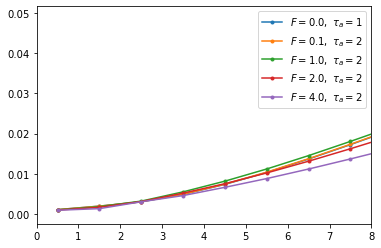

In [11]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
fpath='../../data/SAC/IPD/'
ind=3
for fname in os.listdir(fpath):
    if 'IPD' in fname and '.npz' in fname:
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        kb=float(fname.split('_')[ind+7].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))
        dt=float(fname.split('_')[ind+8].replace('dt',''))
        # print(T,F,Ta,Esoft,R0)

        npzfile=np.load(fpath+fname)

        if F==0.0 or Ta==2:
            ax.plot(npzfile['bins'], npzfile['hist'],'.-', label='$F={:.1f},\ \\tau_a={:.0f}$'.format(F,Ta))

ax.legend()
ax.set_xlim(0,8)